In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [2]:
train=pd.read_csv(r"C:\Users\Admin\Downloads\regression-competition\train.csv")
test=pd.read_csv(r"C:\Users\Admin\Downloads\regression-competition\test.csv")

In [3]:
train.head(5)

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,658.0,25.0,0.50,0.38,0.38,0.63,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.403311,0.406869,31.935479,4356.94587
1,1,109.0,12.5,0.25,0.25,0.25,0.63,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.538704,0.463065,37.033298,6374.44430
2,2,564.0,25.0,0.50,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.474625,0.436043,34.338492,5462.13394
3,3,674.0,25.0,0.50,0.38,0.38,0.63,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.543972,0.441470,36.301847,6443.25690
4,4,467.0,25.0,0.50,0.25,0.38,0.50,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.566319,0.461905,36.047770,6643.90190


In [4]:
train.isnull().sum()

id                      0
Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [5]:
train.describe()

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,425.581267,19.719333,0.389244,0.284588,0.485845,0.591301,82.150340,49.660020,68.638773,59.213653,28.655240,48.553540,18.730664,0.325960,0.500698,0.445770,36.106349,6019.556436
std,4330.271354,213.611550,6.678575,0.406638,0.058933,0.148237,0.146388,9.087681,5.510267,7.590940,6.567238,3.179366,5.356475,11.798220,0.165694,0.076970,0.038424,4.117149,1360.514312
min,0.000000,0.000000,12.500000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,33.000000,1.000000,0.000000,0.163962,0.000000,22.079199,1637.704020
25%,3749.750000,245.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.451083,0.418056,33.231562,5086.609910
50%,7499.500000,466.000000,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.505120,0.445497,35.988555,6109.850470
75%,11249.250000,596.000000,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.564795,0.472468,39.158238,7044.567610
max,14999.000000,776.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,50.800000,55.900000,34.000000,0.560000,0.848908,0.854364,46.585105,8969.401840


In [6]:
test.head(4)

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15000,706.0,25.0,0.50,0.38,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.508275,0.453868,36.018624
1,15001,265.0,12.5,0.25,0.25,0.63,0.50,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.552359,0.455405,38.534569
2,15002,395.0,12.5,0.25,0.38,0.38,0.75,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.611726,0.509528,42.799055
3,15003,565.0,25.0,0.50,0.25,0.63,0.63,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.506794,0.452310,36.674243


In [7]:
test.isnull().sum()

id                      0
Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
dtype: int64

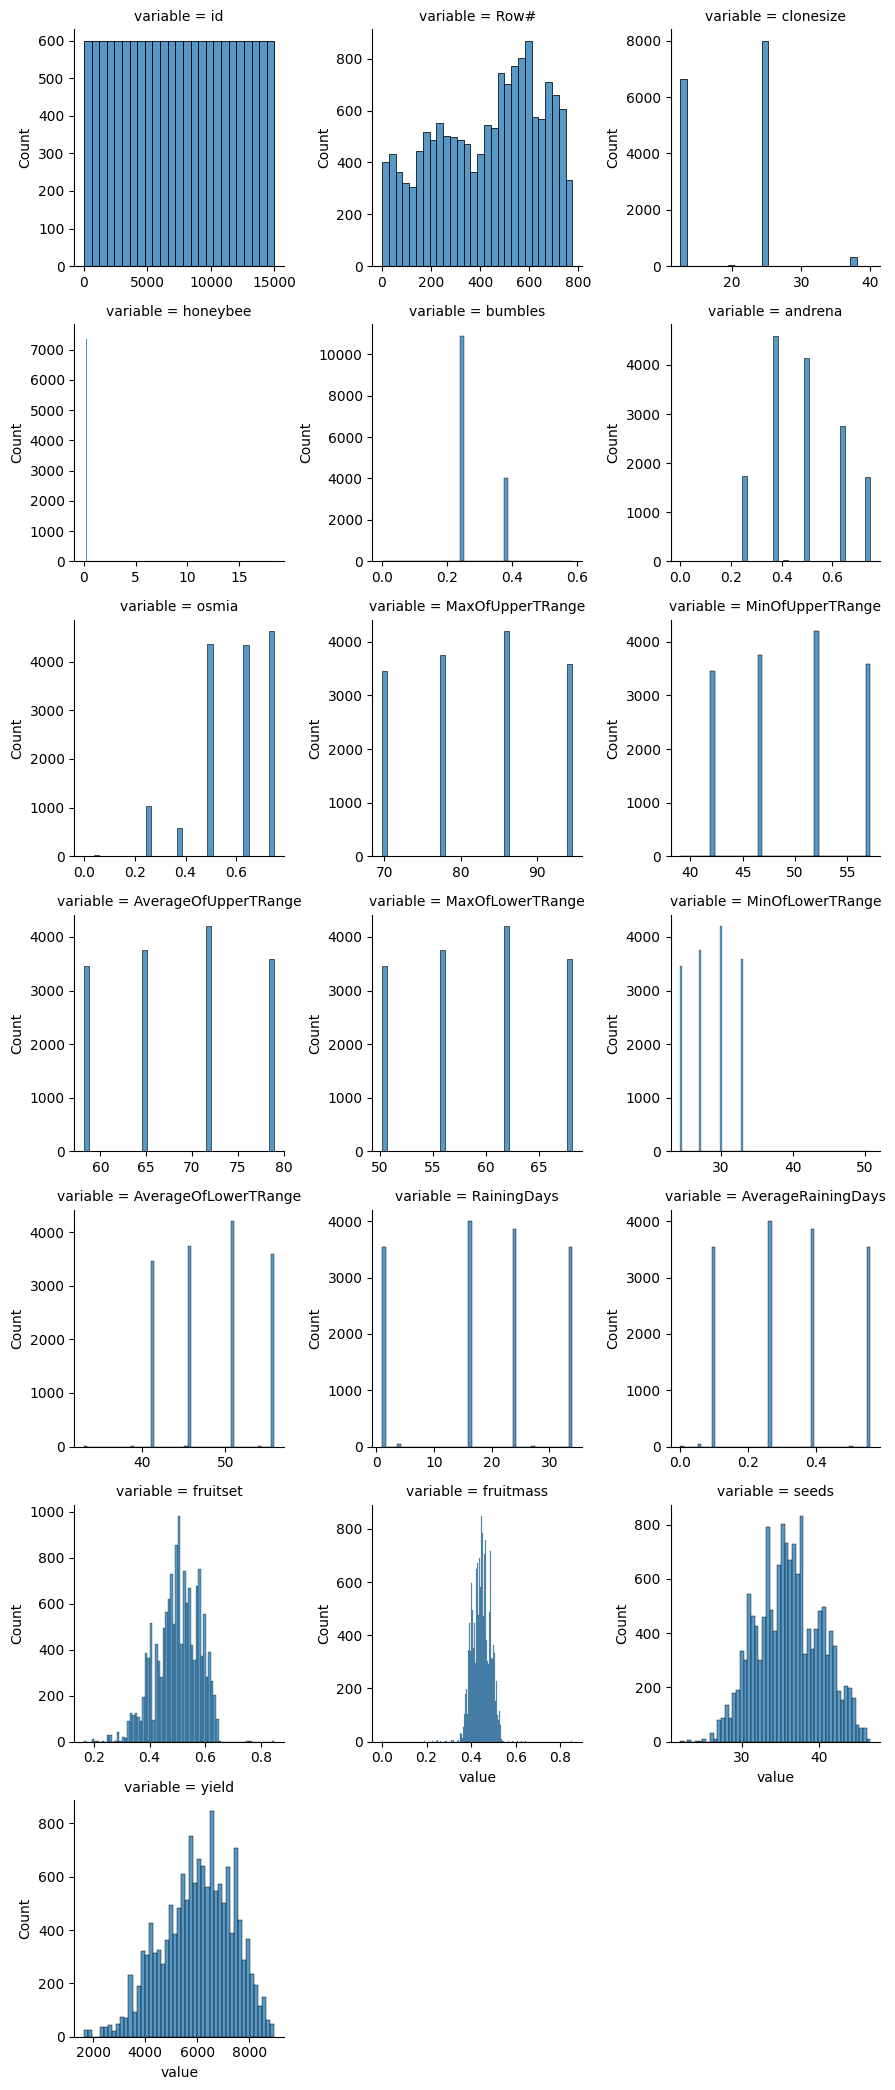

In [8]:
p=sns.FacetGrid(train.melt(),col='variable',col_wrap=3,sharex=False,sharey=False)
p.map(sns.histplot,"value")
plt.show()

In [9]:
X=train.drop(columns='yield',axis=1)
y=train['yield']

In [10]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42) 

In [11]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}
results = {}  #//empty dictionary

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    results[model_name] = {'MSE': mse, 'R²': r2}
    print(f'{model_name} - MSE: {mse:.4f}, R²: {r2:.4f}')


Linear Regression - MSE: 177905.9566, R²: 0.9019
Decision Tree - MSE: 318245.3092, R²: 0.8245
Random Forest - MSE: 161389.3980, R²: 0.9110
Gradient Boosting - MSE: 154641.6642, R²: 0.9147


In [12]:
param_grids = {
    'Linear Regression': {},
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
}

In [13]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error

best_models = {}
results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    if param_grids[model_name]:  # Check if there are parameters to tune
        search = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_grids[model_name],
            n_iter=10,  # Number of parameter settings that are sampled
            cv=2,       # 3-fold cross-validation
            n_jobs=-1,  # Use all available cores
            verbose=2,
            scoring='neg_mean_squared_error',
            random_state=42
        )
        search.fit(X_train, y_train)
        best_models[model_name] = search.best_estimator_
        best_params = search.best_params_
        best_score = search.best_score_
    else:  # For Linear Regression or other models with no hyperparameters to tune
        model.fit(X_train, y_train)
        best_models[model_name] = model
        best_params = "No hyperparameters"
        best_score = -mean_squared_error(y_val, model.predict(X_val))
    
    results[model_name] = {
        'Best Parameters': best_params,
        'Best Score': best_score
    }
    print(f"Best parameters for {model_name}: {best_params}")
    print(f"Best score for {model_name}: {best_score}\n")


Training Linear Regression...
Best parameters for Linear Regression: No hyperparameters
Best score for Linear Regression: -177905.95660551699

Training Decision Tree...
Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best parameters for Decision Tree: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10}
Best score for Decision Tree: -177660.5694622075

Training Random Forest...
Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}
Best score for Random Forest: -143185.58730428392

Training Gradient Boosting...
Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best parameters for Gradient Boosting: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.1}
Best score for Gradient Boosting: -143530.953600989



In [16]:
results

{'Linear Regression': {'Best Parameters': 'No hyperparameters',
  'Best Score': -177905.95660551699},
 'Decision Tree': {'Best Parameters': {'min_samples_split': 10,
   'min_samples_leaf': 4,
   'max_depth': 10},
  'Best Score': -177660.5694622075},
 'Random Forest': {'Best Parameters': {'n_estimators': 100,
   'min_samples_split': 2,
   'min_samples_leaf': 4,
   'max_depth': 10},
  'Best Score': -143185.58730428392},
 'Gradient Boosting': {'Best Parameters': {'n_estimators': 100,
   'min_samples_split': 10,
   'min_samples_leaf': 2,
   'max_depth': 5,
   'learning_rate': 0.1},
  'Best Score': -143530.953600989}}

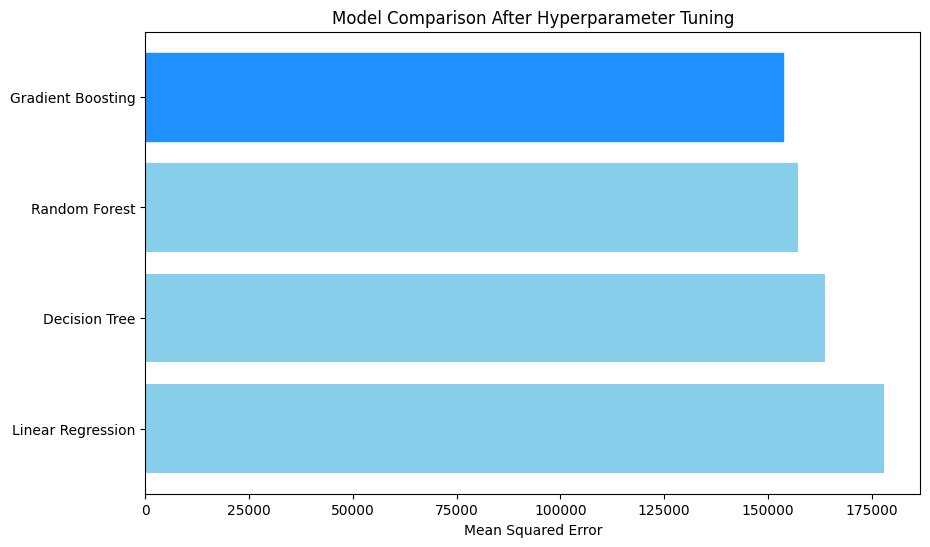

In [22]:
# Visualize the results
model_names = list(results.keys())
mse_values = list(results.values())

plt.figure(figsize=(10, 6))
bars = plt.barh(model_names, mse_values, color='skyblue')

# Highlight the best model (with the lowest MSE)
best_model_name = min(results, key=results.get)
best_index = model_names.index(best_model_name)
bars[best_index].set_color('dodgerblue')

plt.xlabel('Mean Squared Error')
plt.title('Model Comparison After Hyperparameter Tuning')
plt.show()


In [23]:
best_model_name = min(results, key=results.get)
best_index = model_names.index(best_model_name)
print(best_model_name,best_index)

Gradient Boosting 3


In [24]:
best_model = models['Gradient Boosting'][0]  
best_params = grid_search.best_params_ 

In [25]:
#training on entire data
d_train = pd.concat([X_train, X_val], axis=0)
f_train = pd.concat([y_train, y_val], axis=0)


In [26]:
best_model.set_params(**best_params)  # Set the best hyperparameters
best_model.fit(d_train, f_train)

GradientBoostingRegressor(max_depth=5)

In [28]:
X_test=test.copy()
y_pred_test = best_model.predict(X_test)

In [29]:
y_pred_test

array([6102.77383147, 7095.18204285, 7889.78023886, ..., 8262.40435268,
       3785.41332836, 3431.48902465])

In [30]:
submission_df = pd.DataFrame({
    'id': test['id'],  
    'yield': y_pred_test
})

In [32]:
submission_df

,id,yield
0,15000,6102.773831
1,15001,7095.182043
2,15002,7889.780239
3,15003,6210.947706
4,15004,3006.619277
...,...,...
9995,24995,6171.969827
9996,24996,5155.932498
9997,24997,8262.404353
9998,24998,3785.413328


In [33]:
submission_df.to_csv('submissionregression.csv', index=False)